In [65]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

In [89]:
x1 = np.sort(np.random.uniform(0, 1, (100)))
x2 = 0.5 * x1 + np.random.normal(0, 1, (100)) / 10
y = 2 + 2 * x1 + 0.3 * x2 + np.random.normal(0, 1, (100))
data_frame = pd.DataFrame.from_dict({"x1": x1, "x2": x2, "y": y})

**Write out the form of the linear model.
What are the regression coefficients?**

y = β0 + β1*x1 + β2*x2

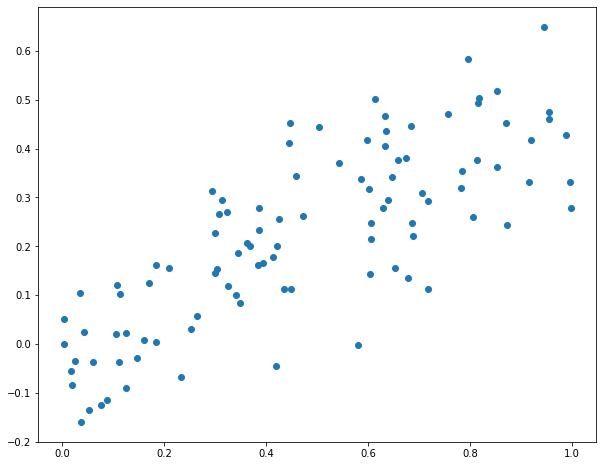

In [90]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x1, x2)

In [91]:
data_frame.corr()

,x1,x2,y
x1,1.000000,0.793478,0.428502
x2,0.793478,1.000000,0.361170
y,0.428502,0.361170,1.000000


**Fit a least squares regression to predict y using
x1 and x2. Describe the results obtained. What are βˆ0, βˆ1, and
βˆ2? How do these relate to the true β0, β1, and β2? Can you
reject the null hypothesis H0 : β1 = 0? How about the null
hypothesis H0 : β2 = 0?**

In [92]:
fit_x12 = smf.ols(formula="y ~ x1 + x2", data=data_frame).fit()

In [93]:
print(fit_x12.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     11.00
Date:                Sat, 26 Nov 2022   Prob (F-statistic):           4.96e-05
Time:                        18:49:02   Log-Likelihood:                -129.35
No. Observations:                 100   AIC:                             264.7
Df Residuals:                      97   BIC:                             272.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3270      0.173     13.413      0.0

In [94]:
fit_x1 = smf.ols(formula="y ~ x1", data=data_frame).fit()

In [95]:
print(fit_x1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     22.04
Date:                Sat, 26 Nov 2022   Prob (F-statistic):           8.68e-06
Time:                        18:49:03   Log-Likelihood:                -129.43
No. Observations:                 100   AIC:                             262.9
Df Residuals:                      98   BIC:                             268.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3207      0.172     13.497      0.0

In [96]:
fit_x2 = smf.ols(formula="y ~ x2", data=data_frame).fit()

In [97]:
print(fit_x2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     14.70
Date:                Sat, 26 Nov 2022   Prob (F-statistic):           0.000223
Time:                        18:49:03   Log-Likelihood:                -132.58
No. Observations:                 100   AIC:                             269.2
Df Residuals:                      98   BIC:                             274.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5890      0.143     18.048      0.0

**Now suppose we obtain one additional observation, which was
unfortunately mismeasured.**

In [98]:
x1_2 = np.append(x1, 0.1)
x2_2 = np.append(x2, 0.8)
y_2 = np.append(y, 6)
data_frame_2 = pd.DataFrame.from_dict({"x1": x1_2, "x2": x2_2, "y": y_2})

In [99]:
y_2

array([2.79987293, 2.94274288, 2.19187231, 1.94343164, 2.24096442,
       1.8697216 , 2.72754264, 1.58950588, 2.01114645, 0.95526449,
       2.74796583, 2.30538614, 2.83593729, 1.41333782, 2.88375626,
       3.17172415, 3.93949096, 1.06630621, 3.30924031, 3.10319918,
       2.43936664, 2.23631505, 3.24913511, 0.01498204, 3.94352645,
       1.70376001, 2.28976525, 3.17209398, 2.95276235, 1.95694462,
       4.10932375, 3.48347587, 4.42319035, 2.55466371, 3.67637379,
       1.82328517, 3.6660268 , 2.27847903, 1.14990619, 3.70798142,
       0.82140042, 1.20139701, 3.17972129, 2.94935206, 3.17102938,
       5.35001295, 5.3662875 , 2.71818061, 2.28549791, 3.50657331,
       2.51422133, 3.6475432 , 3.07197768, 2.16073926, 3.18407139,
       2.66845889, 3.2786738 , 4.18809995, 3.98338721, 2.96495192,
       3.69264248, 1.83351405, 2.37910488, 3.87370665, 2.4774476 ,
       2.80412969, 3.53641088, 3.14681805, 4.06988564, 4.26404952,
       2.80733434, 3.0978903 , 3.55639603, 3.28793648, 4.65065

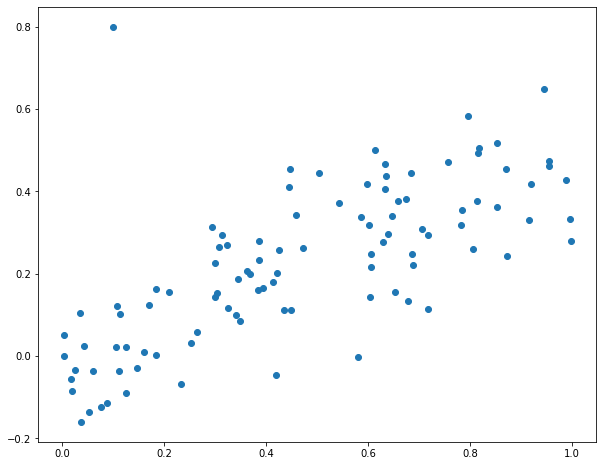

In [100]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x1_2, x2_2)

In [101]:
fit_x12_2 = smf.ols(formula="y ~ x1 + x2", data=data_frame_2).fit()

In [102]:
print(fit_x12_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     11.09
Date:                Sat, 26 Nov 2022   Prob (F-statistic):           4.55e-05
Time:                        18:49:07   Log-Likelihood:                -134.64
No. Observations:                 101   AIC:                             275.3
Df Residuals:                      98   BIC:                             283.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4239      0.177     13.671      0.0

In [103]:
fit_x1_2 = smf.ols(formula="y ~ x1", data=data_frame_2).fit()

In [104]:
print(fit_x1_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     15.63
Date:                Sat, 26 Nov 2022   Prob (F-statistic):           0.000145
Time:                        18:49:08   Log-Likelihood:                -137.54
No. Observations:                 101   AIC:                             279.1
Df Residuals:                      99   BIC:                             284.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4288      0.182     13.379      0.0

In [105]:
fit_x2_2 = smf.ols(formula="y ~ x2", data=data_frame_2).fit()

In [106]:
print(fit_x2_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     20.85
Date:                Sat, 26 Nov 2022   Prob (F-statistic):           1.43e-05
Time:                        18:49:09   Log-Likelihood:                -135.29
No. Observations:                 101   AIC:                             274.6
Df Residuals:                      99   BIC:                             279.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5420      0.143     17.739      0.0